# 5. Preprocessing

but the idea of what a model is can be extended here because if you think about what happens more often than not it's a pretty good idea to first transform your data that you're using for the prediction and the reason for doing that is because the model performance will just be a bit better by doing so so what i figured might be a good idea was spend some videos explaining some of the more frequent transformers that people tend to use and also show that it's important to not forget about these transformers because they do really matter in your pipeline so what ive done here is i've started the notebook i've imported numpy pandas and black. lib and i've imported this dataset called drawdatal and it's a csv file it has a column x a

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


Download using `wget https://calmcode.io/static/data/drawndata1.csv`

In [113]:
df = pd.read_csv("drawndata1.csv")


In [114]:
df.head(3)


,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [115]:
X = df[["x", "y"]].values
y = df["z"] == "a"


and using matplotlib we can show what the dataset looks like

so we've got a group of data points over here and another group of data points over here and we should notice that there seems to be like a small group of outliers over here as well as a small group of outliers over here

but another thing that you should be
aware of is that the y-axis over here is
on a completely different scale as the x-axis over here

and that can be something that's bothersome; the
effect that these axes will have depends on your
algorithm but in general you can imagine that algorithms are sensitive for this kind of thing so

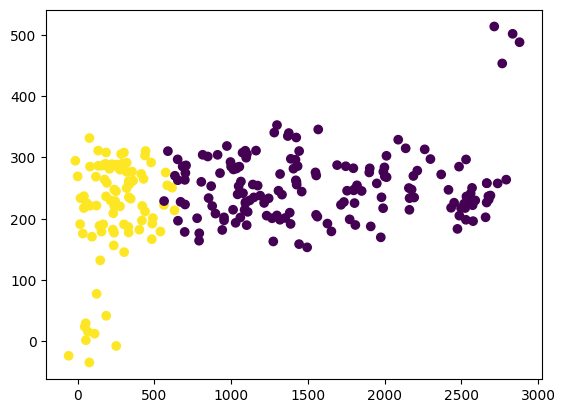

In [116]:
plt.scatter(X[:, 0], X[:, 1], c=y)


so a large chunk of your pre-processing in this case is going to revolve around *scaling*

we want to rescale this data such that there's still information in there but it's just numerically a bit more stable because the x and y axes are just a little bit more in line with each

and as you might be able to guess from the name, a *standard way of doing this* is using the *standard scaler* from scikit-learn

and what it does is for each column it is going to calculate the mean as well as the variance

the idea here being that if you have a data point x and you subtract the mean of x from it and then you divide by the square root of the variance well then you're going to have something that revolves around zero

and this will also have a variance that's kept at bay so what ill now do is ill just go ahead and use the standard scalar to rescale the dataset

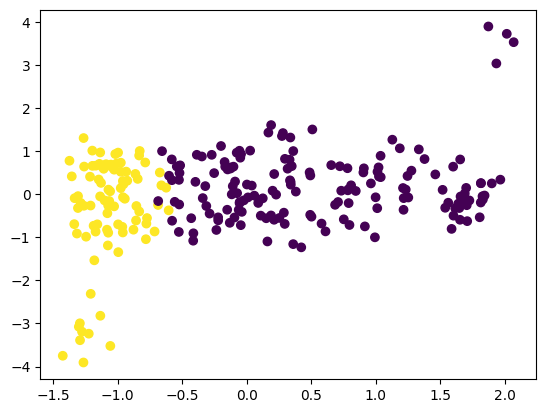

In [117]:
from sklearn.preprocessing import StandardScaler

# Create scaled dataset
X_new = StandardScaler().fit_transform(X)

# Plot new scaled data
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)


So one thing you should notice at this point is that these axes numerically are much more similar!

but it's not exactly perfect though - it seems that this spread is about 8 units (Y/vertical), whereas the spread over here (X/horizontal) is more like three and we can also observe that there's nothing really happening with these outliers in the bottom left and top right corner

so the standard scaler is doing things we like but it does make you wonder is there maybe another way of scaling this

to further demonstrate what might be a weakness of the standard scaler i figured i would generate a data set to make the point just a little bit more tangible


(array([ 44., 239., 208., 141., 109.,  64.,  57.,  52.,  28.,  20.,  12.,
          6.,   8.,   1.,   4.,   1.,   1.,   2.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.57745646, -0.15454651,  3.26836345,  6.69127341, 10.11418336,
        13.53709332, 16.96000328, 20.38291323, 23.80582319, 27.22873315,
        30.6516431 , 34.07455306, 37.49746302, 40.92037297, 44.34328293,
        47.76619288, 51.18910284, 54.6120128 , 58.03492275, 61.45783271,
        64.88074267, 68.30365262, 71.72656258, 75.14947254, 78.57238249,
        81.99529245, 85.41820241, 88.84111236, 92.26402232, 95.68693228,
        99.10984223]),
 <BarContainer object of 30 artists>)

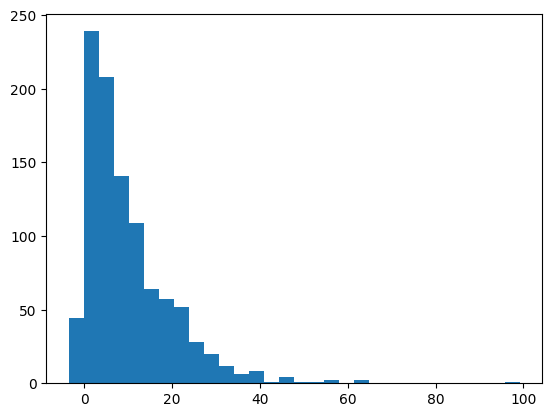

In [118]:
x = np.random.exponential(10, (1000)) + np.random.normal(0, 1, (1000))

plt.hist(x, 30)


so what ive got here is just some data that has a couple of outliers on one end

and what i'm going to do now is i'm going to say well lets take that data set let's subtract from that the mean of the data set and let's then divide by the standard deviation


(array([ 44., 239., 208., 141., 109.,  64.,  57.,  52.,  28.,  20.,  12.,
          6.,   8.,   1.,   4.,   1.,   1.,   2.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.34680476, -1.0041919 , -0.66157904, -0.31896618,  0.02364668,
         0.36625954,  0.7088724 ,  1.05148526,  1.39409812,  1.73671098,
         2.07932384,  2.4219367 ,  2.76454956,  3.10716242,  3.44977528,
         3.79238814,  4.135001  ,  4.47761385,  4.82022671,  5.16283957,
         5.50545243,  5.84806529,  6.19067815,  6.53329101,  6.87590387,
         7.21851673,  7.56112959,  7.90374245,  8.24635531,  8.58896817,
         8.93158103]),
 <BarContainer object of 30 artists>)

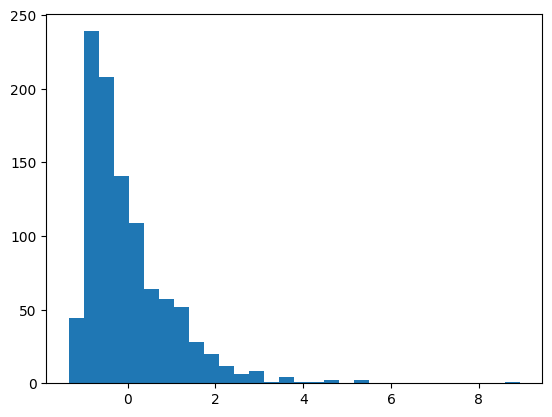

In [119]:
plt.hist((x - np.mean(x)) / np.std(x), 30)


you should notice a few things and yes for starters definitely the numbers we have here on the x-axis these are definitely *scaled* so you could argue that's a good thing

but the downside is we still have outliers and depending on the algorithm that you're using outliers will make life a little bit harder for you

so let's instead conceptually come up with a different way of normalizing where these outliers are just a little bit less of a problem

so let's say that this is my original data set (showing stuff on the screen in the video, can't put it here :()

now what i could do is i could calculate the mean valu which would probably be around here and i could then say oh let's standardize around that but let's calculate some other values instead let's let's ignore the mean for now instead what i could do is i could calculate the quantiles i could imagine for example that the 50th percent quantile is over here and that means that 50 of all the data is on this side of the line and 50 of the data is on that side of the line i could imagine that maybe the 25th quantile is over here and that means that 25 of all the data is on the left side and 75 is on the right side and i think that the 75th quantile will be somewhere over here and let's say the 99th that might be over here this is something that we could go ahead and calculate

and if i were now to think hey how can i project that onto something that's normalized well i could have a number line down below and i would have the number 50 halfway the number 100 would be all the way to the right the number zero will be over here i would have 25 over here and 75 over here
and i hope you can see that there's a mapping here
and notice when i scale it this way that then in this scaled representation the distance from the outlier to the 75th quantile is a lot smaller

and that means that by using quantiles as opposed to means and standard deviations we may be able to get a more robust pre-processing step if there's outliers in here

so let's use this idea as a pre-processing step and see what the effect is on our data set

In [120]:
from sklearn.preprocessing import QuantileTransformer


In [121]:
# X_new2 = QuantileTransformer().fit_transform(X)


now there's a warning typically scikit-learn likes to calculate a thousand quantiles and the data set that we gave it doesn't have enough data for it so what i'm just going to go ahead and do is turn that number of quantiles into a hundred

In [122]:
X_new2 = QuantileTransformer(n_quantiles=100).fit_transform(X)


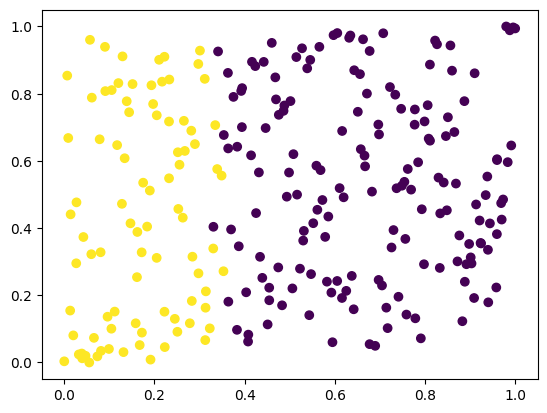

In [123]:
plt.scatter(X_new2[:, 0], X_new2[::, 1], c=y)


but notice that the minimum as well as the maximum on both axes are exactly equal to zero and one

and you might also recognize that the clusters that we saw earlier are still in the data - it's just that they have less of a profound effect and the reason for that is because now we're using *quantiles* to transform and scale as opposed to using the *mean* and *standard deviation*

in the previous video we showed that when you take your x matrix and you pass it through a transformer the quantile transformer that you can get a very different output and what i would like to show in this video is that when you take that output and then pass that to a model that then the predictions are also going to be very different

how we're gonna classify everything and if i were to compare the predicted data plot you'll really see a big difference and in this particular case i might argue as far as numerical stability goes the quantile transformer does have benefits but it would still be a good idea to verify this with a grid search but i hope that you can imagine that the quantile transformer even with the grid search is just going to be more stable in the long run because these groups of outliers are not going to have as much of an effect anymore

now let's take a look at a different dataset

Download using `wget https://calmcode.io/static/data/drawndata2.csv`

In [124]:
df = pd.read_csv("drawndata2.csv")
X = df[["x", "y"]].values
y = df["z"] == "a"


and this dataset is special in the sense that it's a dataset that represents a classification task that is not linearly separable

it's not possible for me to draw a single line such that on one side of the line i'll have purple points and on the other side of the line i'll have yellow points

and this might make you think that a logistic regression is not going to be the right choice- for this task you may need to have a different algorithm here to get a good classifier

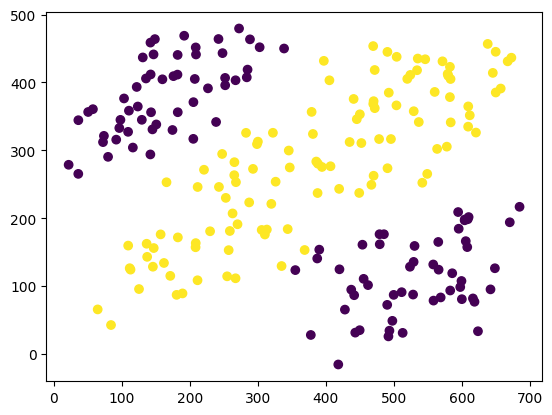

In [125]:
plt.scatter(X[:, 0], X[:, 1], c=y)


so let's see if that is accurate

so what you see right now is a pipeline that has a quantile transformer first as a pre-processing and then a logistic regression

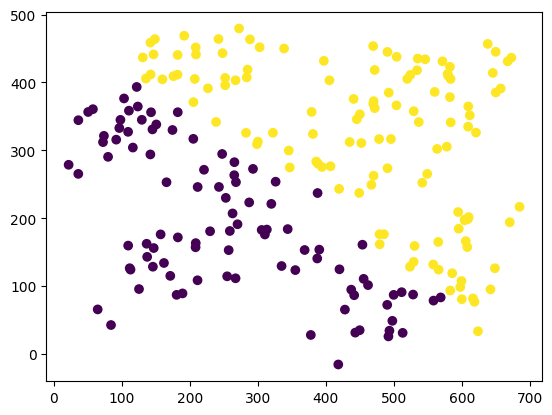

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [("scale", QuantileTransformer(n_quantiles=100)), ("model", LogisticRegression())]
)

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)


the best thing the logistic regression has been able to do is come up with this line to separate the two classes

and this is obviously a bad classifier these two groups should be the same color and the line should not separate this way

but maybe we can fix this with preprocessing instead!

if i consider the two axes that i have at my disposal here then essentially what is happening is the logistic regression will get x1 and x2 and at the moment it can only use those two columns to come up with a separating line

but what if i generate x1 times x2 as another feature that's something that the logistic regression might be able to use

and what about x1 to the power of 2 and x2 to the power of 2?

what you could say is that we can limit ourselves to the linear features but we can also just use those linear features to come up with non-linear features that our model might be able to use

so let's change the pipeline such that we add these features in as well and then see what the effect is

In [127]:
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline(
    [
        ("scale", PolynomialFeatures()),
        ("model", LogisticRegression()),
    ]
)


and just start a new object over here now note that im not changing any of the input variables here

but one thing that's nice to point out is that i am only calculating the interactions at the moment and i'm only calculating this for a degree of 2 but i could increase this if i wanted to but let's just see what the effect is

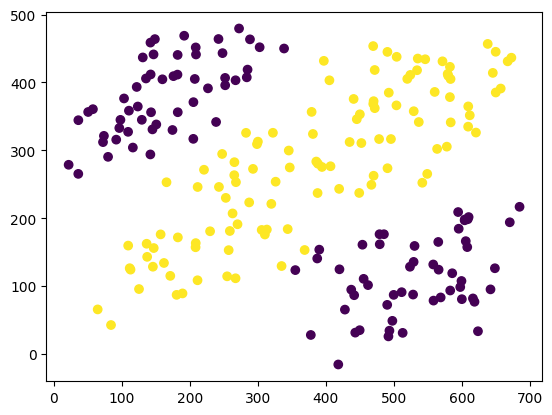

In [128]:
pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)


i would argue we have a near perfect classification and granted this is on the train set so it's cheating a little bit

but what i do hope to have shown here is how much of an effect a single pre processing step could have in your pipeline - the effects can actually be quite drastic
